In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datasets/social_network_ads.csv", index_col='User ID')

In [3]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [4]:
df['Purchased'].value_counts() / df.shape[0]

Purchased
0    0.6425
1    0.3575
Name: count, dtype: float64

In [5]:
df['Gender'].value_counts() / df.shape[0]

Gender
Female    0.51
Male      0.49
Name: count, dtype: float64

In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [64]:
df.corr()['Purchased']

Gender             0.042469
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

<Axes: ylabel='Frequency'>

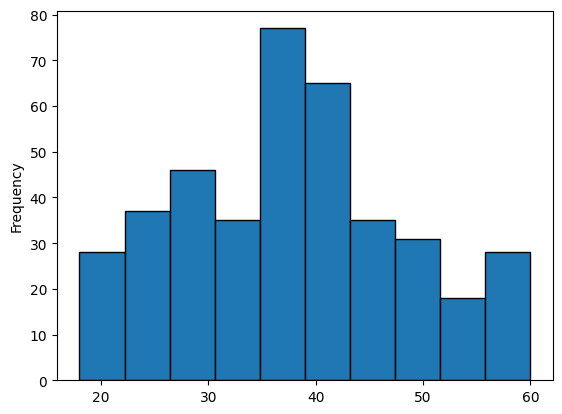

In [8]:
df['Age'].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

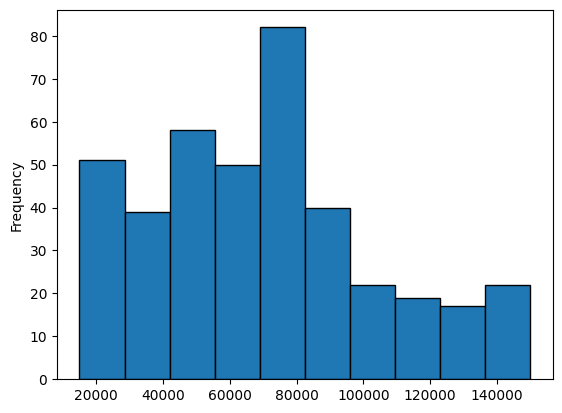

In [9]:
df['EstimatedSalary'].plot(kind='hist', edgecolor='black')

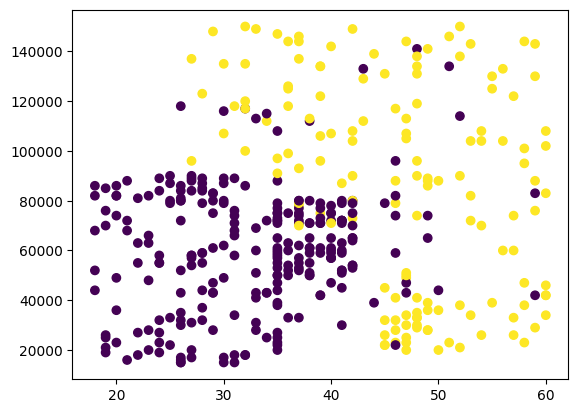

In [67]:
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'])

In [11]:
df['Gender'].replace({"Male" : 0, "Female" : 1}, inplace=True)

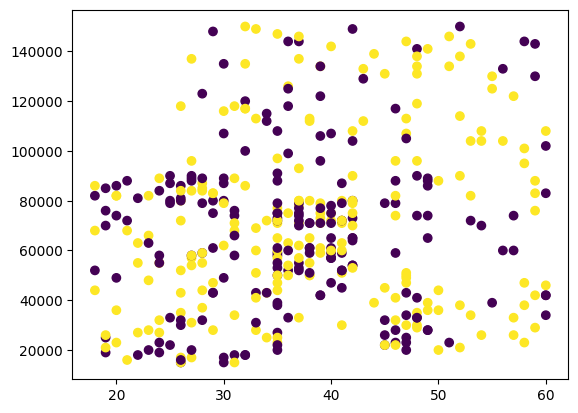

In [12]:
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Gender'])

In [13]:
X = df.drop(columns=['Gender', 'Purchased']).values
y = df['Purchased'].values

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Creating Pipeline for each models based on there requirements

In [15]:
from sklearn.metrics import classification_report

In [16]:
from mlxtend.plotting import plot_decision_regions

In [17]:
from sklearn.pipeline import Pipeline

# Logistic Regression

In [18]:
# logistic regression
    # - scaling
    # - polynomial feature

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
lor = LogisticRegression(penalty='l2')

In [20]:
lor_pipe = Pipeline([
    ("scaling", StandardScaler()),
    ("poly features", PolynomialFeatures(degree=3)),
    ("lor", lor)
])

In [21]:
lor_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('poly features', PolynomialFeatures(degree=3)),
                ('lor', LogisticRegression())])

<Axes: >

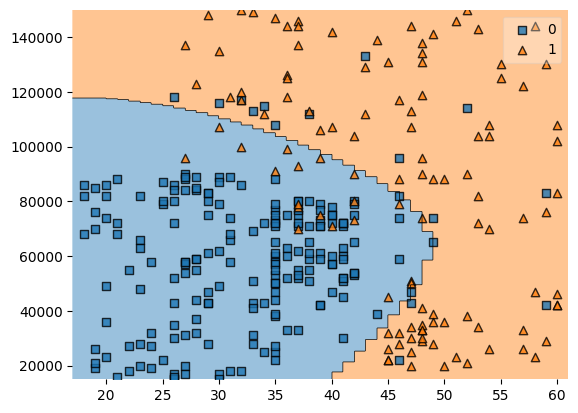

In [22]:
plot_decision_regions(X_train, y_train, lor_pipe)

In [23]:
y_pred_ = lor_pipe.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.960784,0.896552,0.9375,0.928668,0.938303
recall,0.942308,0.928571,0.9375,0.935440,0.937500
f1-score,0.951456,0.912281,0.9375,0.931869,0.937745
support,52.000000,28.000000,0.9375,80.000000,80.000000


### Comparism of Age and Salary column after scaling

<Axes: ylabel='Density'>

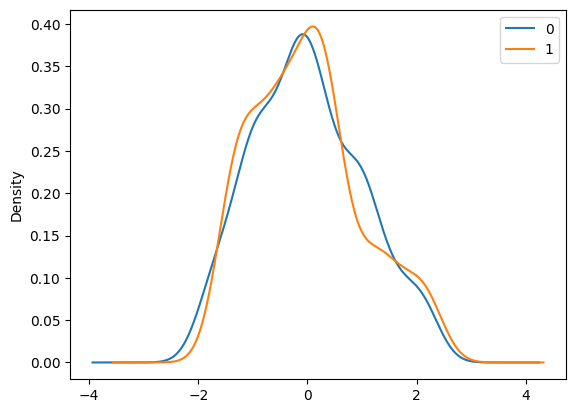

In [60]:
scaler = StandardScaler()
# X = age, y= salary
pd.DataFrame(scaler.fit_transform(X_train)).plot(kind='kde')

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

In [26]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
y_pred_ = dt.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.940000,0.833333,0.9,0.886667,0.902667
recall,0.903846,0.892857,0.9,0.898352,0.900000
f1-score,0.921569,0.862069,0.9,0.891819,0.900744
support,52.000000,28.000000,0.9,80.000000,80.000000


<Axes: >

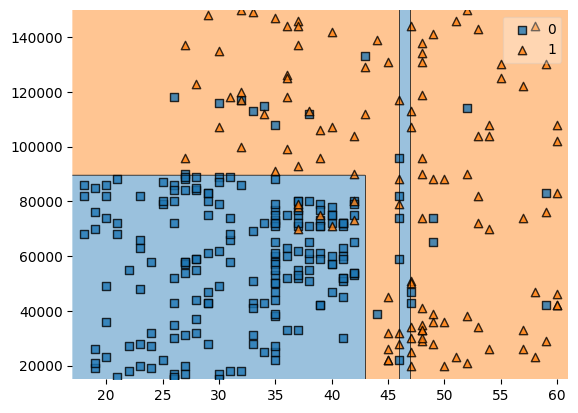

In [28]:
plot_decision_regions(X_train, y_train, dt)

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline([
    ("scaling", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=13))
])

In [30]:
knn_pipe.fit(X_train, y_train)
y_pred_ = knn_pipe.predict(X_test)

pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.979592,0.870968,0.9375,0.925280,0.941573
recall,0.923077,0.964286,0.9375,0.943681,0.937500
f1-score,0.950495,0.915254,0.9375,0.932875,0.938161
support,52.000000,28.000000,0.9375,80.000000,80.000000


<Axes: >

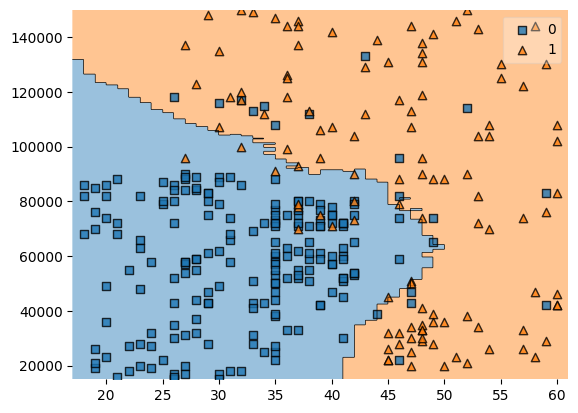

In [31]:
plot_decision_regions(X_train, y_train, knn_pipe)

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=100, bootstrap=True)
rf.fit(X_train, y_train)
y_pred_ = rf.predict(X_test)

pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.979592,0.870968,0.9375,0.925280,0.941573
recall,0.923077,0.964286,0.9375,0.943681,0.937500
f1-score,0.950495,0.915254,0.9375,0.932875,0.938161
support,52.000000,28.000000,0.9375,80.000000,80.000000


<Axes: >

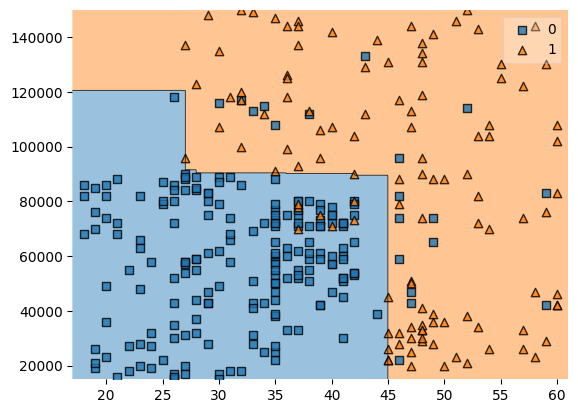

In [45]:
plot_decision_regions(X_train, y_train, rf)

# Voting Algorithm

In [32]:
from sklearn.ensemble import VotingClassifier

In [54]:
estimators = [
    ("lor_pipe", lor_pipe), 
    ("dt", dt),
    ("knn", knn_pipe)
]

In [55]:
voting = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

In [56]:
for name, model in estimators:
    score = np.mean(cross_val_score(model, X, y, cv=10, scoring='accuracy'))
    print(f"{name}: ", round(score, 2))

lor_pipe:  0.89
dt:  0.85
knn:  0.91


In [57]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lor_pipe',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('poly features',
                                               PolynomialFeatures(degree=3)),
                                              ('lor', LogisticRegression())])),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('knn',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=13))]))])

In [58]:
np.mean(cross_val_score(voting, X, y, cv=10, scoring='accuracy'))

0.9099999999999999

In [62]:
y_pred_ = voting.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.979592,0.870968,0.9375,0.925280,0.941573
recall,0.923077,0.964286,0.9375,0.943681,0.937500
f1-score,0.950495,0.915254,0.9375,0.932875,0.938161
support,52.000000,28.000000,0.9375,80.000000,80.000000


<Axes: >

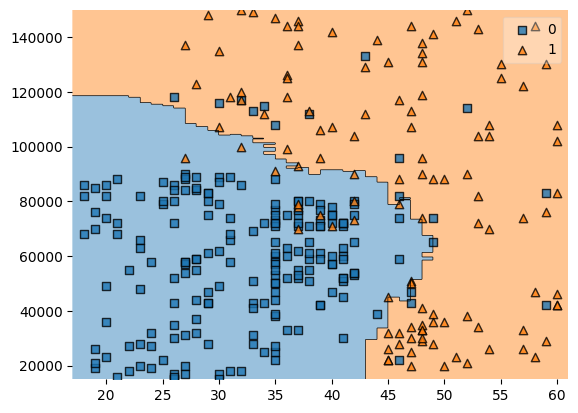

In [51]:
plot_decision_regions(X_train, y_train, voting)

In [68]:
voting.classes_

array([0, 1])

In [76]:
voting.estimators_

[Pipeline(steps=[('scaling', StandardScaler()),
                 ('poly features', PolynomialFeatures(degree=3)),
                 ('lor', LogisticRegression())]),
 DecisionTreeClassifier(max_depth=3),
 Pipeline(steps=[('scaling', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=13))])]